In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from scipy import stats

In [39]:
df = pd.read_csv('../MDAC2/data.csv')
df.head()

,Unnamed: 0,Revenue,Profit Center,Day_Open,Month,Year,CustomerCounts,Semester,Region,Dollar_Person
0,0,7455.62,Profit Center Annenberg Cart(305),11,Jan,2016,2085,Spring,Retail West,3.64
1,1,59371.08,Profit Center CC CBTL(281),27,Jan,2016,14554,Spring,RTCC,4.36
2,2,52161.07,Profit Center Coffee Bean & Tea Leaf(275),16,Jan,2016,11625,Spring,Retail West,4.80
3,3,75420.01,Profit Center CPK(286),22,Jan,2016,8969,Spring,RTCC,8.74
4,4,23116.88,Profit Center Edmondson Faculty Center(296),19,Jan,2016,1181,Spring,Restaurant,18.04


In [40]:
df.isnull().sum()
# missing value had been handelled in data manipulation part

Unnamed: 0        0
Revenue           0
Profit Center     0
Day_Open          0
Month             0
Year              0
CustomerCounts    0
Semester          0
Region            0
Dollar_Person     0
dtype: int64

In [41]:
df.dtypes

Unnamed: 0          int64
Revenue           float64
Profit Center      object
Day_Open            int64
Month              object
Year                int64
CustomerCounts      int64
Semester           object
Region             object
Dollar_Person     float64
dtype: object

## Change object to category

In [42]:
tran_col = df.select_dtypes(include = 'object').columns
tran_col

Index(['Profit Center', 'Month', 'Semester', 'Region'], dtype='object')

In [43]:
df[tran_col] = df[tran_col].apply(lambda x: x.astype('category'))
df[tran_col].dtypes

Profit Center    category
Month            category
Semester         category
Region           category
dtype: object

In [44]:
df.Year = df.Year.astype('category')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.dtypes

Revenue            float64
Profit Center     category
Day_Open             int64
Month             category
Year              category
CustomerCounts       int64
Semester          category
Region            category
Dollar_Person      float64
dtype: object

## One hot encoding

In [45]:
df2 = pd.get_dummies(df)

In [46]:
df2.head()

,Revenue,Day_Open,CustomerCounts,Dollar_Person,Profit Center_Profit Center Annenberg Cart(305),Profit Center_Profit Center CC CBTL(281),Profit Center_Profit Center CPK(286),Profit Center_Profit Center Cammilleri Cafe(385),Profit Center_Profit Center Coffee Bean & Tea Leaf(275),Profit Center_Profit Center Edmondson Faculty Center(296),...,Semester_Fall,Semester_Spring,Semester_Summer,Semester_Winter,Region_HSC,Region_Others,Region_RTCC,Region_Restaurant,Region_Retail East,Region_Retail West
0,7455.62,11,2085,3.64,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,59371.08,27,14554,4.36,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,52161.07,16,11625,4.80,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,75420.01,22,8969,8.74,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,23116.88,19,1181,18.04,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [47]:
df2.select_dtypes(include = 'category').columns

Index([], dtype='object')

## Distribution of Revenue

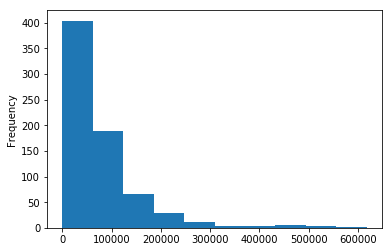

In [48]:
df2.Revenue.plot(kind='hist')

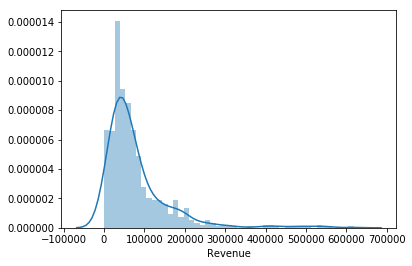

In [49]:
# distribution of original revenue
sn.distplot(df2.Revenue)

[scipy.stats.probplot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)

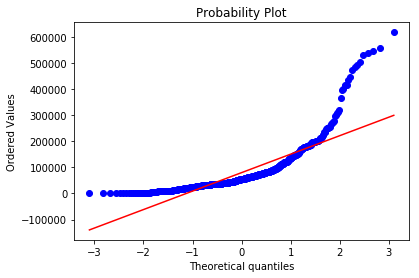

In [50]:
# qq plot (probability plot) of original revenue
stats.probplot(df['Revenue'], dist='norm', fit=True, plot=plt)
plt.show()

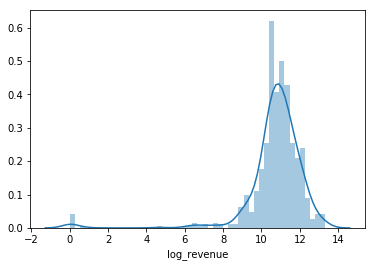

In [51]:
# distribution of log(data+1)
df2['log_revenue'] = np.log(df2['Revenue']+1)
sn.distplot(df2['log_revenue'])

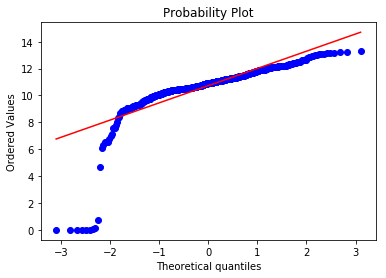

In [52]:
stats.probplot(df2['log_revenue'], dist='norm', fit=True, plot=plt)
plt.show()

Before we standardize the revenue, we need to split the data to training set and test set. Calculate the mean and variance of revenue in training set, then apply it to test set.

## Split into training set and test set
Training set: From Janurary 2016 to August 2017

Test set: From September 2017 to December 2017

In [53]:
df2.head(1)

,Revenue,Day_Open,CustomerCounts,Dollar_Person,Profit Center_Profit Center Annenberg Cart(305),Profit Center_Profit Center CC CBTL(281),Profit Center_Profit Center CPK(286),Profit Center_Profit Center Cammilleri Cafe(385),Profit Center_Profit Center Coffee Bean & Tea Leaf(275),Profit Center_Profit Center Edmondson Faculty Center(296),...,Semester_Spring,Semester_Summer,Semester_Winter,Region_HSC,Region_Others,Region_RTCC,Region_Restaurant,Region_Retail East,Region_Retail West,log_revenue
0,7455.62,11,2085,3.64,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,8.916858


In [54]:
mask1 = df2['Year_2017'] == 1
mask2 = (df2['Month_Sep'] == 1) | (df2['Month_Oct'] == 1) | (df2['Month_Nov'] == 1) | (df2['Month_Dec'] == 1)
test = df2[mask1 & mask2]

In [55]:
train = df2.loc[~df2.index.isin(test.index),:]
print(train.shape, test.shape)

(584, 63) (135, 63)


## Standardize Revenue and plot its distribution

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train['Revenue'].reshape(-1,1))
train['revenue_std'] = scaler.transform(train['Revenue'].reshape(-1,1))
test['revenue_std'] = scaler.transform(test['Revenue'].reshape(-1,1))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks

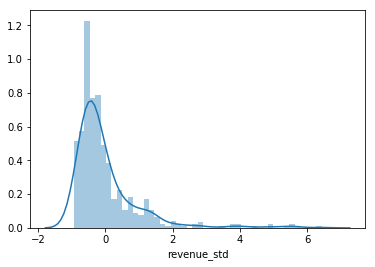

In [57]:
# plot the distribution of revenue_std
sn.distplot(train['revenue_std'])

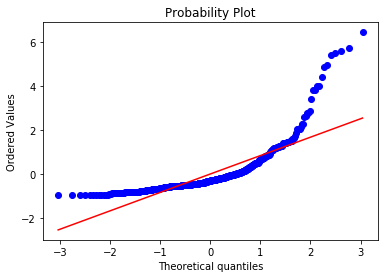

In [58]:
# qq plot of revenue_std
stats.probplot(train['revenue_std'],dist='norm', fit=True, plot=plt)
plt.show()

Here, I choose not to use standardization because 

1) When we scale the predictions back to the original presentation, there might be negative revenue;

2) The distribution of log(revenue+1) is more like a normal distribution

## Check multicollinearity

In [59]:
X_train = train.drop(['Revenue','CustomerCounts','log_revenue','revenue_std'], axis=1)
y_train = train['log_revenue']
X_test = test.drop(['Revenue','CustomerCounts','log_revenue','revenue_std'], axis=1)
y_test = test['log_revenue']
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(584, 60) (584,) (135, 60) (135,)


In [60]:
print("Check multicollinearity")

def get_redundant_pairs(X_train):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = X_train.columns
    for i in range(0, X_train.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(X_train, n=10):
    au_corr = X_train.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(X_train)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(X_train, n=10))

Check multicollinearity
Top Absolute Correlations
Month_Dec                                          Semester_Winter                                      1.000000
Year_2016                                          Year_2017                                            1.000000
Dollar_Person                                      Profit Center_Profit Center Express Catering(319)    0.982140
Profit Center_Profit Center Satellite(294)         Region_Others                                        0.711823
Profit Center_Profit Center Express Catering(319)  Region_Others                                        0.685329
Dollar_Person                                      Region_Others                                        0.675714
Month_Aug                                          Semester_Fall                                        0.567941
Month_May                                          Semester_Summer                                      0.529732
Semester_Spring                               

In [61]:
cols_to_drop = ['Year_2016','Semester_Winter','Profit Center_Profit Center Express Catering(319)']
X_train.drop(cols_to_drop, axis=1, inplace=True)
X_test.drop(cols_to_drop, axis=1, inplace=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(584, 57) (135, 57) (584,) (135,)


# Modelling

In [62]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [63]:
# Split the dataset into training and test data
X_train1, X_val1, y_train1, y_val1 = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0)
print(X_train1.shape, X_val1.shape, y_train1.shape, y_val1.shape)

(467, 57) (117, 57) (467,) (117,)


## Ridge regression

In [64]:
# Ridge Regression Model
print ("---Ridge Regression Model for Revenue---")
tuned_parameters = [{ 
                    'alpha' :[0.000001, 0.01, 0.1, 1, 10, 100]}
                ]
model1 = GridSearchCV(Ridge(), tuned_parameters, 
                       scoring='neg_mean_squared_error', cv=10, verbose=1
                     )
model1.fit(X_train1, y_train1)

print("Best parameters set found on development set:")
print(model1.best_params_)

print()
print("Grid scores on development set:")
for params, mean_score, scores in model1.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
            % (mean_score, scores.std() * 2, params))
print()

y_hat = model1.predict(X_val1)
mse = mean_squared_error(y_val1, y_hat)
print("Mean Squared Error on validation set = %0.4f" % mse)

---Ridge Regression Model for Revenue---
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best parameters set found on development set:
{'alpha': 0.1}

Grid scores on development set:
-0.937 (+/-2.150) for {'alpha': 1e-06}
-0.937 (+/-2.148) for {'alpha': 0.01}
-0.936 (+/-2.126) for {'alpha': 0.1}
-0.965 (+/-1.980) for {'alpha': 1}
-1.073 (+/-1.845) for {'alpha': 10}
-1.214 (+/-1.922) for {'alpha': 100}

Mean Squared Error on validation set = 0.6401


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [65]:
test['pred_log'] = model1.predict(X_test)
mse = mean_squared_error(test['pred_log'], y_test)
print("Mean Squared Error on test set = %0.4f" % mse)

Mean Squared Error on test set = 1.2502


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
test['pred'] = np.exp(test['pred_log'])-1
test.loc[:,['pred','Revenue']]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,pred,Revenue
584,4328.915657,2964.44
585,20512.983048,34812.35
586,130734.264435,73380.21
587,107473.730891,92533.66
588,95565.465099,88299.00
589,47732.325545,31051.32
590,43353.641297,73164.55
591,46583.231065,149934.24
592,59602.387208,58357.63
593,74963.954742,55685.70


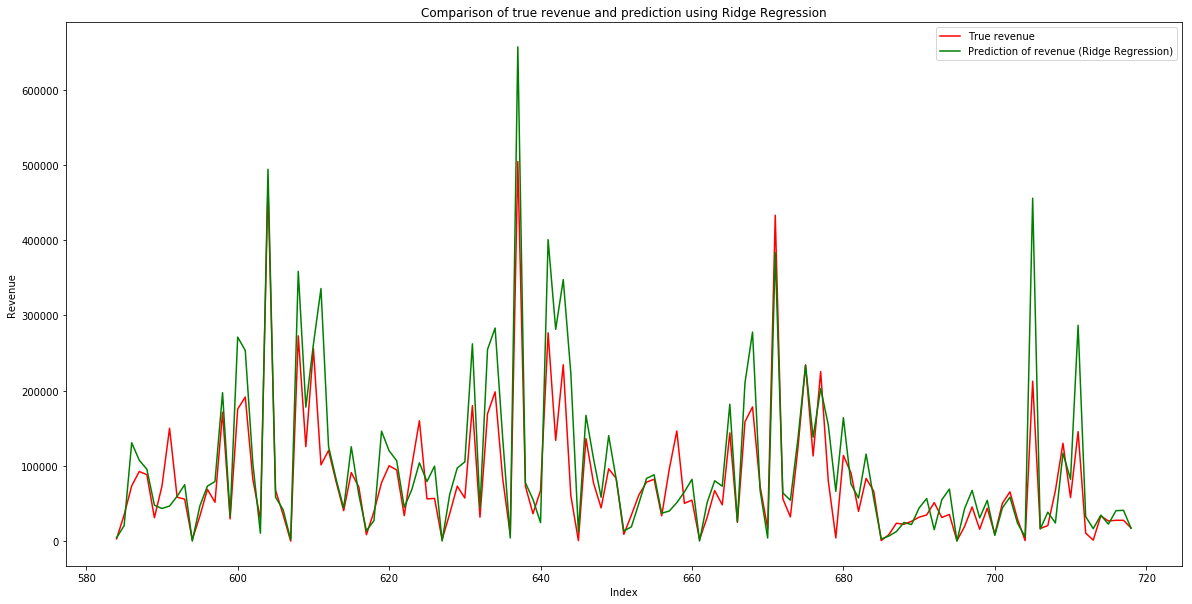

In [70]:
plt.figure(figsize=(20,10))
plt.title('Comparison of true revenue and prediction using Ridge Regression')
plt.plot(test.index, test['Revenue'], color='red', label='True revenue')
plt.plot(test.index, test['pred'], color='green', label='Prediction of revenue (Ridge Regression)')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Revenue')
plt.show()
# label：图例，注意如果写这个参数一定要加上plt.legend()，之后再plt.show()才有用！

Conclusion of Ridge Regression Models:

Using cross validation, we found the best parameter is {'alpha': 0.1}

MSE on training dataset is 0.6401, on test dataset is 1.2502

## Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
# Random Forest Model
print ("---Random Forest Model for Revenue---")
tuned_parameters = [{ 
                    'n_estimators' :[100, 200, 400, 600, 800],
                    'max_features' :["auto", "sqrt"],
                    'max_depth':[6, 12, 24, 36]
}
                ]
model2 = GridSearchCV(RandomForestRegressor(), tuned_parameters, 
                       scoring='neg_mean_squared_error', cv=10, verbose=1
                     )
model2.fit(X_train1, y_train1)

print("Best parameters set found on development set:")
print(model2.best_params_)

print()
print("Grid scores on development set:")
for params, mean_score, scores in model2.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
            % (mean_score, scores.std() * 2, params))
print()

y_hat = model2.predict(X_val1)
mse = mean_squared_error(y_val1, y_hat)
print("Mean Squared Error on validation set = %0.4f" % mse)

---Random Forest Model for Revenue---
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  5.2min finished


Best parameters set found on development set:
{'max_depth': 24, 'max_features': 'sqrt', 'n_estimators': 200}

Grid scores on development set:
-0.987 (+/-1.856) for {'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}
-0.991 (+/-1.894) for {'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}
-0.985 (+/-1.875) for {'max_depth': 6, 'max_features': 'auto', 'n_estimators': 400}
-0.968 (+/-1.815) for {'max_depth': 6, 'max_features': 'auto', 'n_estimators': 600}
-0.962 (+/-1.791) for {'max_depth': 6, 'max_features': 'auto', 'n_estimators': 800}
-1.042 (+/-2.120) for {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}
-1.117 (+/-2.304) for {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200}
-1.111 (+/-2.248) for {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 400}
-1.131 (+/-2.303) for {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 600}
-1.101 (+/-2.247) for {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 800}
-0.887 (+/-1.821) 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [74]:
test['pred_log_rf'] = model2.predict(X_test)
mse_rf = mean_squared_error(test['pred_log_rf'], y_test)
print("Mean Squared Error (Random Forest) on test set = %0.4f" % mse_rf)

Mean Squared Error (Random Forest) on test set = 0.6222


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
test['pred_rf'] = np.exp(test['pred_log_rf'])-1
test.loc[:,['pred','pred_rf','Revenue']]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,pred,pred_rf,Revenue
584,4328.915657,7953.441773,2964.44
585,20512.983048,45320.322044,34812.35
586,130734.264435,76836.746237,73380.21
587,107473.730891,77250.948040,92533.66
588,95565.465099,103789.429325,88299.00
589,47732.325545,37647.320866,31051.32
590,43353.641297,60337.466192,73164.55
591,46583.231065,123180.068542,149934.24
592,59602.387208,50812.012729,58357.63
593,74963.954742,57040.378706,55685.70


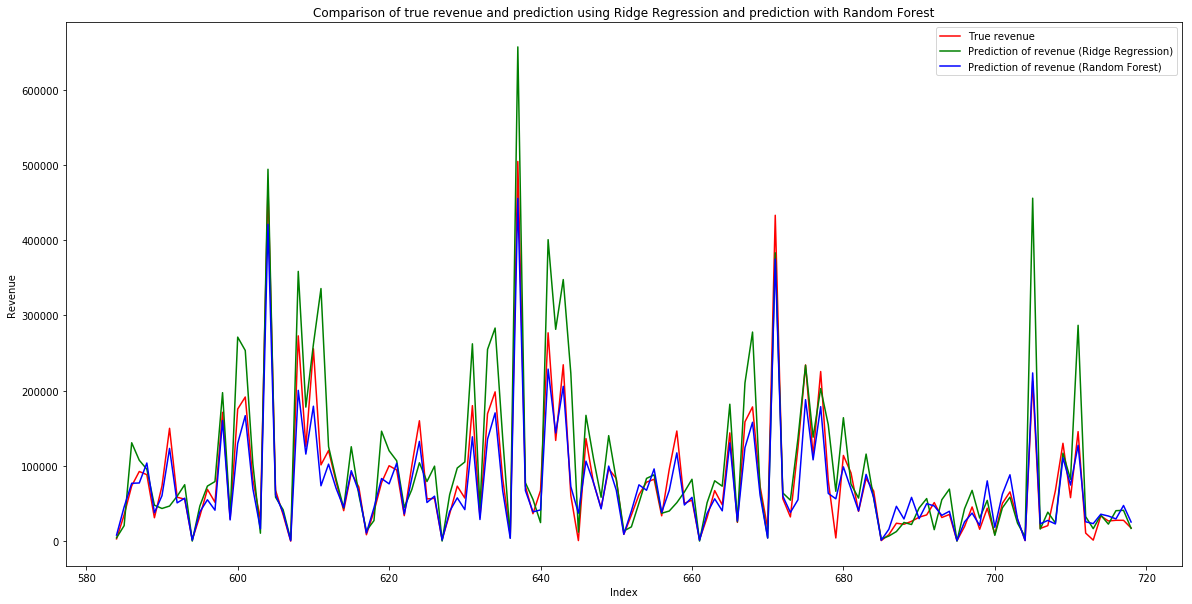

In [76]:
plt.figure(figsize=(20,10))
plt.title('Comparison of true revenue and prediction using Ridge Regression and prediction with Random Forest')
plt.plot(test.index, test['Revenue'], color='red', label='True revenue')
plt.plot(test.index, test['pred'], color='green', label='Prediction of revenue (Ridge Regression)')
plt.plot(test.index, test['pred_rf'], color='blue', label='Prediction of revenue (Random Forest)')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Revenue')
plt.show()
# label：图例，注意如果写这个参数一定要加上plt.legend()，之后再plt.show()才有用！

Conclusion of Random Forest Model:

Using cross validation, we found the best parameter is {'max_depth': 24, 'max_features': 'sqrt', 'n_estimators': 200}

MSE on training dataset is 0.3181 (0.6401 for ridge regression), on test dataset is 0.6222 (1.2502 for ridge regression)

## Conclusion:
Use Random Forest model with parameter:{'max_depth': 24, 'max_features': 'sqrt', 'n_estimators': 200}

MSE on training dataset is 0.3181 (0.6401 for ridge regression), on test dataset is 0.6222 (1.2502 for ridge regression)